In [53]:
source('helpers.R')
kaggle.house.loadLibraries()

df.combined = kaggle.house.PrepareCombinedDataSet()
df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage %>% count()

n
2433


* Neighborhood == 'Somerst' & LotShape2 == 'Reg'
* Neighborhood == 'Somerst' & LotShape2 != 'Reg'
* Neighborhood != 'Somerst' & LotShape2 == 'Reg' & HouseStyle.2Story == 'N' & GarageType2 == 'Detchd'
* Neighborhood != 'Somerst' & LotShape2 == 'Reg' & HouseStyle.2Story == 'N' & GarageType2 == 'Attchd'
* Neighborhood != 'Somerst' & LotShape2 == 'Reg' & HouseStyle.2Story == 'N' & GarageType2 == 'Another'
* Neighborhood != 'Somerst' & LotShape2 == 'Reg' & HouseStyle.2Story == 'Y'
* Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 == 'Corner'
* Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 == 'Inside'
* Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 != 'Inside' & LotConfig2 != 'Corner'
* 
* A1 & B1
* A1 & B2
* A2 & B1 & C1 & E1
* A2 & B1 & C1 & E2
* A2 & B1 & C1 & E3
* A2 & B1 & C2
* A2 & B2 & D1
* A2 & B2 & D2
* A2 & B2 & D3

In [63]:
options(repr.plot.width = 10, repr.plot.height = 10)

df = 
    df.lot_frontage %>%
    mutate(
        Split.Condition = case_when(
            Neighborhood == 'Somerst' ~ 
                
                case_when(
                    LotShape2 == 'Reg' ~ 'Somerst Reg Shape',
                    LotShape2 != 'Reg' ~ 'Somerst Irreg Shape'
                ),
            
            Neighborhood != 'Somerst' ~
                
                case_when(
                    LotShape2 == 'Reg' ~
                        
                        case_when(
                            HouseStyle.2Story == 'N' ~
                                case_when(
                                    GarageType2 == 'Detchd'  ~ 'Reg Shape 2Story Garage Detchd',
                                    GarageType2 == 'Attchd'  ~ 'Reg Shape 2Story Garage Attchd',
                                    GarageType2 == 'Another' ~ 'Reg Shape 2Story Garage Another'
                                ),
                            HouseStyle.2Story == 'Y' ~ 'Reg Shape 2Story'
                        ),
                    
                    LotShape2 != 'Reg' ~
                        case_when(
                            LotConfig2 == 'Corner' ~ 'Irreg Shape Corner',
                            LotConfig2 == 'Inside' ~ 'Irreg Shape Inside',
                            LotConfig2 != 'Inside' & LotConfig2 != 'Corner' ~ 'Irreg Shape Another Config'
                        )
                    
                )
        )
    ) %>%
    group_by(Split.Condition)

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% summarise(n=n())
df %>% summarise(n=n()) %>% summarise(sum(n))
model %>% glance(mod)
model %>% tidy(mod)

Split.Condition,n
Irreg Shape Another Config,101
Irreg Shape Corner,123
Irreg Shape Inside,433
Reg Shape 2Story,403
Reg Shape 2Story Garage Another,154
Reg Shape 2Story Garage Attchd,605
Reg Shape 2Story Garage Detchd,452
Somerst Irreg Shape,49
Somerst Reg Shape,113


sum(n)
2433


Split.Condition,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
Irreg Shape Another Config,0.08690393,0.07768073,0.37234693,9.422326,2.766346e-03,2,-42.521905,91.04381,98.88917,13.725582,99
Irreg Shape Corner,0.42330944,0.41854340,0.20391180,88.817895,3.790331e-16,2,22.057113,-38.11423,-29.67767,5.031183,121
Irreg Shape Inside,0.30432032,0.30270621,0.24479397,188.538001,7.581044e-36,2,-4.020552,14.04110,26.25332,25.827281,431
Reg Shape 2Story,0.86861144,0.86828379,0.17843507,2651.016185,7.967247e-179,2,123.753061,-241.50612,-229.50931,12.767468,401
Reg Shape 2Story Garage Another,0.61774388,0.61522904,0.22392848,245.639158,1.486310e-33,2,12.940018,-19.88004,-10.76918,7.621882,152
Reg Shape 2Story Garage Attchd,0.73361615,0.73317439,0.14745037,1660.650739,2.340109e-175,2,300.673347,-595.34669,-582.13101,13.110192,603
Reg Shape 2Story Garage Detchd,0.27667712,0.27506974,0.14934222,172.128811,1.589916e-33,2,219.126710,-432.25342,-419.91237,10.036394,450
Somerst Irreg Shape,0.43393465,0.42189070,0.30995755,36.029282,2.668880e-07,2,-11.112331,28.22466,33.90012,4.515463,47
Somerst Reg Shape,0.98092928,0.98075747,0.06516072,5709.441459,2.771905e-97,2,149.260431,-292.52086,-284.33870,0.471297,111


Split.Condition,term,estimate,std.error,statistic,p.value
Irreg Shape Another Config,(Intercept),1.5822263,0.78980634,2.0033092,4.787739e-02
Irreg Shape Another Config,LotArea.Log,0.2555048,0.08323770,3.0695807,2.766346e-03
Irreg Shape Corner,(Intercept),-0.4245613,0.52604986,-0.8070743,4.212073e-01
Irreg Shape Corner,LotArea.Log,0.5300931,0.05624733,9.4243247,3.790331e-16
Irreg Shape Inside,(Intercept),0.7430773,0.25627483,2.8995328,3.928211e-03
Irreg Shape Inside,LotArea.Log,0.3808421,0.02773610,13.7309141,7.581044e-36
Reg Shape 2Story,(Intercept),-1.8681138,0.11535872,-16.1939543,9.657657e-46
Reg Shape 2Story,LotArea.Log,0.6697016,0.01300694,51.4880198,7.967247e-179
Reg Shape 2Story Garage Another,(Intercept),-0.5991792,0.30026712,-1.9954874,4.777667e-02
Reg Shape 2Story Garage Another,LotArea.Log,0.5246281,0.03347362,15.6728797,1.486310e-33


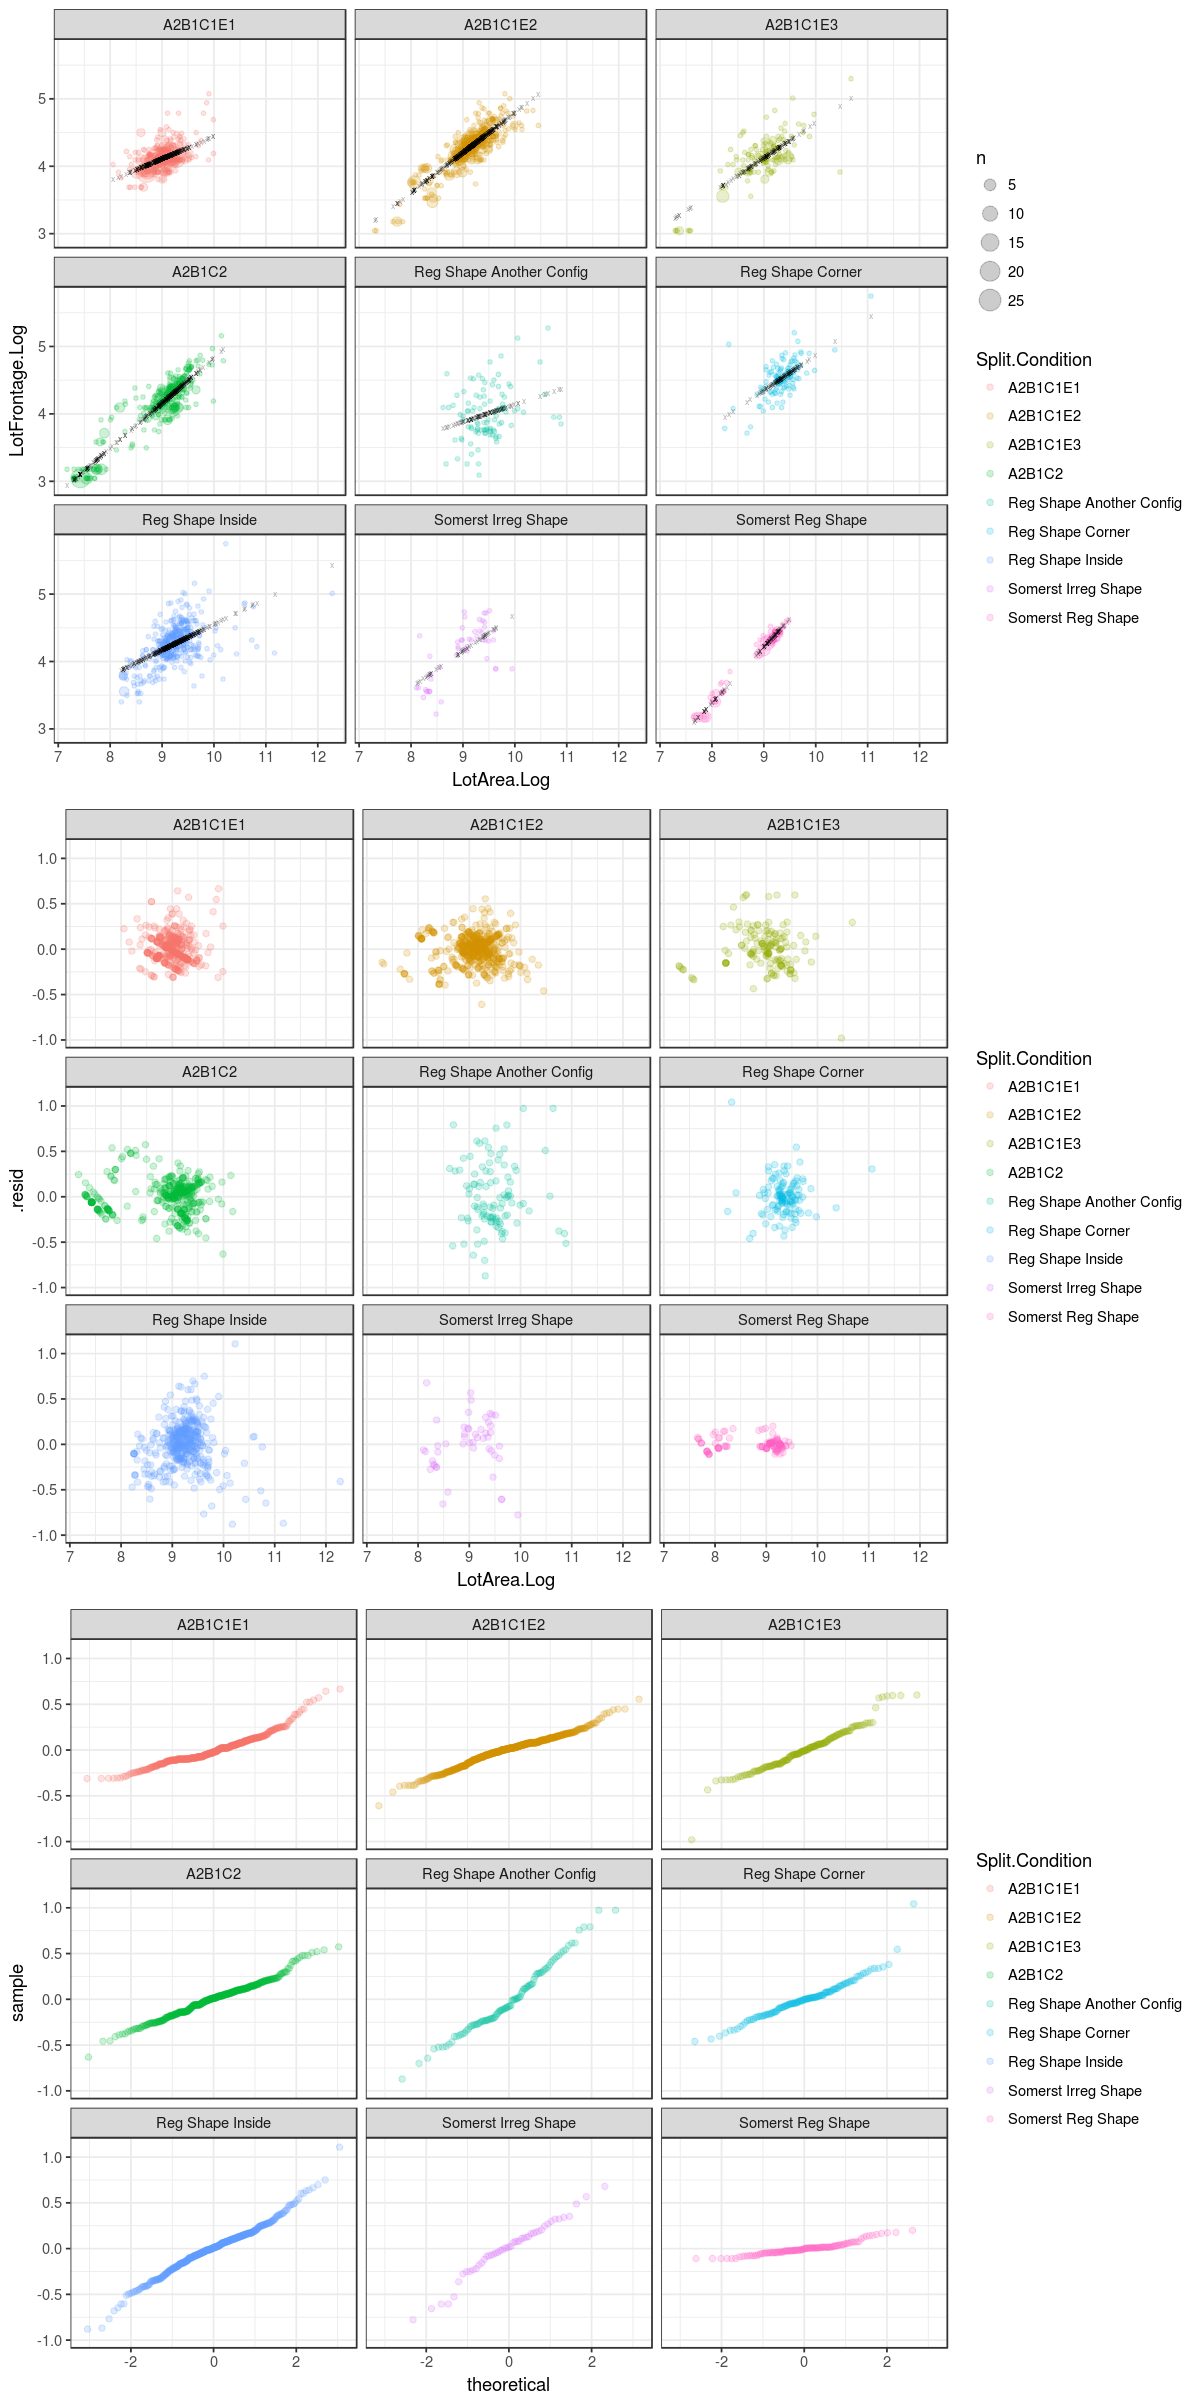

In [62]:
options(repr.plot.width = 10, repr.plot.height = 20)

g1 = 
    ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = Split.Condition), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    facet_wrap(~Split.Condition) +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=Split.Condition), alpha=0.2) +
    facet_wrap(~Split.Condition) +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid, colour=Split.Condition)) +
    stat_qq(distribution=qnorm, alpha=0.2) +
    facet_wrap(~Split.Condition) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)